<h1>Name: Lee Jia Yi</h1>
<h2>EE4211 HW1 </h2>

**a)Graph	the	total	population	vs	year**


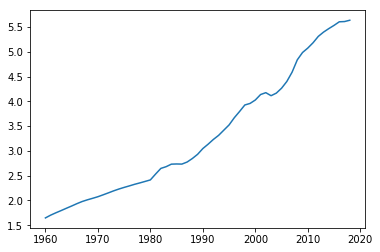

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
from sklearn import metrics
%matplotlib inline

pop = [1646400, 1702400, 1750200, 1795000, 1841600, 1886900, 1934400, 1977600, 2012000, 2042500, 2074507, 2112900, 2152400, 2193000, 2229800, 2262600, 2293300, 2325300, 2353600, 2383500, 2413945, 2532835, 2646466, 2681061, 2732221, 2735957, 2733373, 2774789, 2846108, 2930901, 3047132, 3135083, 3230698, 3313471, 3419048, 3524506, 3670704, 3796038, 3927213, 3958723, 4027887, 4138012, 4175950, 4114826, 4166664, 4265762, 4401365, 4588599, 4839396, 4987573, 5076732, 5183688, 5312437, 5399162, 5469724, 5535002, 5607283, 5612253, 5638676]
pop = np.array(pop) / float(1000000)
yr = [y for y in range(1960,2019)]

plt.plot(yr,pop)
plt.show()


**b. Use linear regression to build an estimator the population of Singapore in the future. Use the data for years 2013 and earlier as training data.**

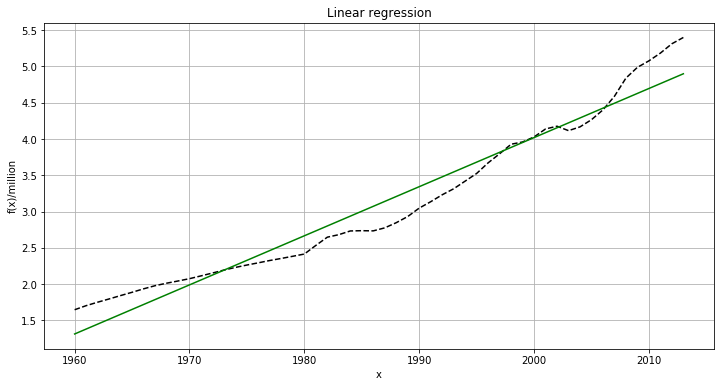

In [34]:
trainingData=dict()
trainingData['yr']=yr[:-5]
trainingData['pop']=pop[:-5]
testData=dict()
testData['yr']=yr[-5:]
testData['pop']=pop[-5:]

x=trainingData['yr']
y=trainingData['pop']
x=np.array(x)
y=np.array(y)

lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)
# Now, we predict points with our trained model.
y_lr = lr.predict(x[:, np.newaxis])

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(x, y, '--k')
ax.plot(x, y_lr, 'g')
#ax.plot(x, y_lr)
#ax.set_xlim(0, 1.5)
#ax.set_ylim(-10, 80)
ax.set_title("Linear regression")
plt.xlabel("x")
plt.ylabel("f(x)/million")
plt.grid()


**c. What are the slope and y-intercept of the best fit line? What is the 
mean squared error of the estimator on the training data?**


In [35]:
slope = (y_lr[-1] - y_lr[0]) / (x[-1] - x[0])
yIntercept = y_lr[0] - slope * x[0]

squaredErrors = [(y_lr[k]-y[k])**2 for k in range(len(y_lr))]

meanSquaredError = np.mean(squaredErrors)

print('slope: '+str(slope))
print('y-intercept: '+str(yIntercept))
#print('mean squared error for training data (in millions^2): '+str(meanSquaredError))
print('mean squared error for training data (in millions^2): ' + str(metrics.mean_squared_error(y,y_lr)))

slope: 0.06766815414522613
y-intercept: -131.3172653946769
mean squared error for training data (in millions^2): 0.054314237527527044


**d. Use years > 2013 as test data and predict the data for those five years. What is the mean squared error of the estimator on the test data?**

mean squared error for test data (in millions^2): 0.2234522402835803


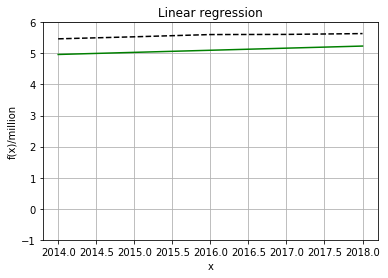

In [38]:
# Test model on test data
x=testData['yr']
y=testData['pop']
x=np.array(x)
y=np.array(y)

y_lr = lr.predict(x[:, np.newaxis])

fig,ax=plt.subplots(1,1)
ax.plot(x, y, '--k')
ax.plot(x, y_lr, 'g')
#ax.plot(x, y_lr)
#ax.set_xlim(0, 1.5)
ax.set_ylim(-1, 6)
ax.set_title("Linear regression")
plt.xlabel("x")
plt.ylabel("f(x)/million")
plt.grid()

# calculate slope and y-intercept
slope = (y_lr[-1] - y_lr[0]) / (x[-1] - x[0])
yIntercept = y_lr[0] - slope * x[0]
#print(yIntercept)
squaredErrors = [(y_lr[k]-y[k])**2 for k in range(len(y_lr))]

meanSquaredError = np.mean(squaredErrors)
#print('slope: '+str(slope))
#print('y-intercept: '+str(yIntercept))
#print('mean squared error for test data (in millions^2): '+str(meanSquaredError))
print('mean squared error for test data (in millions^2): ' + str(metrics.mean_squared_error(y,y_lr)))

**e. What is your estimate of Singapore’s population in 2030 and 2050? Do 
you think these estimates are reasonable?**

Estimated Populations (millions)
2030: 6.049087520132133
2050: 7.402450603036641
Reasonable, as population at 2018 is 5.638676 million


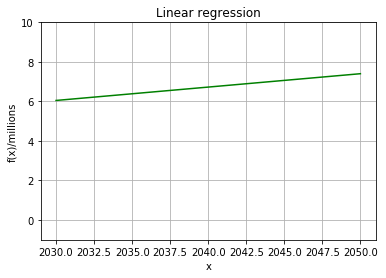

In [6]:
x=[k for k in range(2030,2051)]
x=np.array(x)
y_lr = lr.predict(x[:, np.newaxis])
fig,ax=plt.subplots(1,1)
#ax.plot(x, y, '--k')
ax.plot(x, y_lr, 'g')
#ax.plot(x, y_lr)
#ax.set_xlim(0, 1.5)
ax.set_ylim(-1, 10)
ax.set_title("Linear regression")
plt.xlabel("x")
plt.ylabel("f(x)/millions")
plt.grid()
print('Estimated Populations (millions)')
print('2030: ' + str( y_lr[0]))
print('2050: ' + str( y_lr[-1]))
print('Reasonable, as population at 2018 is ' + str( pop[-1]) + ' million')

**f. How could you improve your estimates of the future population of 
Singapore?**


One way to improve it is to use a nonlinear model to fit our data points.